<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Redes Neuronales Librería



- La derivación es el aspecto algorítmicamente más costoso en la utilización de clasificadores basados en redes neuronales. 

- Calcular las decenas, centenares o centenares de miles de derivadas parciales sería una tarea abrumadora si la tuviéramos que resolver a mano cada vez que construimos una red neuronal. 

- Afortunadamente contamos con herramientas que hacen eficientemente esa labor por nosotros. **Keras** es una de ellas. 



## Keras

[Keras](https://keras.io/) es una API escrita en Python que nos permite de una forma rápida y cómoda configurar y entrenar redes neuronales.

<img src="Figures/keras-logo.png" width="30%">

- Hay otra cosa que Keras hace por nosotros y que es sumamente importante: trasladar el cálculo a la GPU en lugar de hacerlo en la CPU. Todo el cálculo que realiza la red para generar una salida es computacionalmente muy alto. Son muchísimas las multiplicaciones y sumas que se llevan a cabo. Pero, afortunadamente, la inmensa mayoría de estas operaciones son paralelizables. Y, de la misma forma que los juegos actuales utilizan la GPU para poder mover rápidamente una inmensa cantidad de puntos, vértices y polígonos, esta misma arquitectura de computación paralela se adapta perfectamente a las necesidades de cálculo de las redes neuronales.

- Por supuesto, cuando las redes y sus conjuntos de datos son pequeños no es indispensable disponer de GPU en el ordenador. Pero en cuanto el modelo o los datos crecen el tiempo de cómputo se vuelve crucial.

**Keras, a su vez, se apoya sobre otras herramientas como [Tensorflow](https://www.tensorflow.org/) y [CUDA](https://developer.nvidia.com/cuda-zone) (si disponemos de GPU).**



## Instalación

Visita [https://keras.io/#installation](https://keras.io/#installation) para instalar Keras. Antes debes [instalar Tensorflow](https://www.tensorflow.org/install). 

**Modo rápido:** Si quieres, puedes realizar una instalación limpia de Keras mediante un entorno virtual (recomendable). 

**Instala ambiente virtual con Anaconda**

Desde consola:

<code>conda create -n nombre_de_tu_entorno</code>

Crea el entorno virtual

<code>conda create -n nombre_de_tu_entorno python=3.6</code>

Activa el entorno virtual

<code>conda activate nombre_de_tu_entorno<\code>

Dentro del entorno, instala Tensorflow:

<code>pip install tensorflow</code>

y luego, Keras:

<code>pip install keras</code>

Con esto tendrás una instalación de Keras para realizar las prácticas, pero sin GPU. Si tu ordenador no tiene GPU, entonces será la opción adecuada. 
    
Podemos instalar todas las librerías que necesitemos como pandas, numpy, matplotlib

<code>pip install keras</code>
<code>pip install pandas</code>
<code>pip install matplotlib</code>

**Añadir el Ambiente virtual a Jupyter Notebook**

Jupyter Notebook se asegura de que el kernel de IPython esté disponible, pero se debe agregar manualmente un kernel con una versión diferente de Python o un entorno virtual. 
    
-Primero, necesitamos activar su entorno virtual. 
    
-A continuación, instalaremos ipykernel, que proporciona el kernel de IPython para Jupyter:

<code>pip install --user ipykernel</code>

Ahora se pude añadir un ambiente virtual a jupyter con el siguiente comando:

<code>python -m ipykernel install --user --name=myenv</code>

Ahora podemos elegir el entorno conda como Kernel en Jupyter.

### Modelo

La estructura principal de Keras es el **modelo**, lo cual es una forma de organizar y conectar capas de neuronas. El tipo de modelo más simple es el **modelo secuencial**, que es una pila lineal de capas. Para arquitecturas más complejas, es necesario utilizar la **API funcional** de Keras, que permite crear capas con conexiones arbitrarias.

In [3]:
import pandas as pd
import numpy as np

In [1]:
# Creamos nuestro modelo
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential


Ahora apilaremos capas con <code>.add()</code>. Keras denomina a las capas neuronales básicas como **densas** <code>Dense</code>, lo que significa que todas las entradas son conectadas a todas las neuronas. Como observamos en la figura siguiente, todas las $n$ entradas se conectan a todas las $m$ neuronas. Veremos más adelante que esto no siempre es así. Hay capas denominadas **convolutivas** que no siguen este patrón de conexión, sino que parte de las entradas se conectan solo a algunas neuronas de la capa. Pero, por ahora, eso es otra historia.

<img src="Figures/densa.svg" width="30%">

Fíjate que en la instanciación de la primera capa densa tenemos que especificar el número de entradas <code>input_dim=4</code>, pero en la siguiente capa no. Keras sabe que son $5$ entradas puesto que en la capa anterior hay $5$ neuronas <code>units=5</code>

In [4]:
model = Sequential()

In [5]:
#Creando la arquitectura de la red neuronal
#importar dense
from tensorflow.keras.layers import Dense
# capa con 4 entradas
model.add(Dense(input_dim=4, units=5, activation = 'sigmoid')) #4 entradas conectadas a 5 neuronas
# capa con 5 neuronas
model.add(Dense(units = 3, activation = 'softmax')) # 5 entradas conectadas a 3 neuronas


### Configuración del entrenamiento

Una vez configurado el modelo, especificaremos el proceso de aprendizaje.

- La **función de error** o **pérdida** (**loss**) que utilizaremos es <code>loss='mse'</code>, lo que significa *mean squared error* o error cuadrático medio. Es parecida a la suma de todos los errores que ya hemos visto pero dividido por el número de muestras sobre las que calculamos el error. 

- En cuando al optimizador, usaremos el clásico gradiente descendente <code>optimizer=keras.optimizers.SGD(lr=1)</code> (stochastic gradient descent) al que le aplicamos un *learning rate* o **tasa de aprendizaje** de $1$. 

\- Lo de *gradiante descendente*, ya lo sabemos. Pero, ¿lo de *estocástico* qué significa? 

En este contexto, **estocástico** significa que no vamos a calcular el error sobre todo el conjunto de muestras en cada iteración sino sobre un subconjunto **aleatorio** de ellos. Ese subconjunto corresponde al *mini-batch* que ya vimos.

Durante el proceso de entrenamiento vamos progresivamente descendiendo por la función de error hasta llegar a algún mínimo. Para verificar que vamos avanzando adecuadamente es conveniente ir comprobando cómo el valor de la función de error va bajando (*loss*). Sin embargo, *loss* es un valor que no indica nada en sí, solo que si baja es buena señal. Pero, lo que realmente nos va diciendo cuánto vamos mejorando es el *accuracy* (precisión) <code>metrics=['accuracy']</code>. Este valor se calcula introduciendo las muestras en la red y comprobando qué porcentaje de ellas ha clasificado correctamente.

In [6]:
# compilar el modelo
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1), metrics=['accuracy'])

### Preparación de los datos. Entrenamiento y test

Una vez completamente definido el modelo y cómo lo vamos a entrenar es necesario preparar los datos sobre los que vamos a trabajar. Esta vez vamos a dividir nuestro conjunto de muestras en dos subconjuntos: uno  para **entrenar** (*train*) y otro para **verificar** (*test*). Cuando entrenamos una red neuronal con un conjunto de muestras, ¿cómo podemos estar seguros de que esa red es capaz de clasificar correctamente nuevas muestras que nunca haya visto antes? Dicho de otro modo, ¿cómo podemos saber si la red puede **generalizar**?

Para saber si una red ha aprendido correctamente hacemos esta división. Vamos a entrenar la red con el **conjunto de entrenamiento**. Y una vez entrenada comprobaremos cuántas muestras del **conjunto de test** es capaz de clasificar correctamente. Si el porcentaje de aciertos es satisfactorio concluimos que la red está correctamente entrenada.


In [9]:
# Cargamos el dataset iris
data_iris = pd.read_csv('Data/iris.data', header=None)
data_iris['out'] = data_iris.iloc[:,4].astype('category').cat.codes
data_iris.head(3)
# Etiquetas en formato one-hot

# Particionando la data Tomamos el 80% (120) de las muestras para entrenar y el 20% (30) para testear



,0,1,2,3,4,out
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


In [10]:
data_iris = data_iris.values

In [11]:
#desordenar el dataset
np.random.shuffle(data_iris)

In [12]:
# Creación de la función one-hot
def one_hot(x, n):
    if type(x)==list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)), x]=1
    return o_h

In [14]:
x_data = data_iris[:,:4].astype(float)
y_data = one_hot(data_iris[:,5].astype(int), 3)

In [17]:
# Partición de las muestras 80% para el train, y el 20% test
x_train = x_data[:120]
x_test = x_data[120:]

y_train = y_data[:120]
y_test = y_data[120:]


### Entrenamiento

Procedemos a hacer el entrenamiento de la red. Para ello solo tenemos que invocar al método <code>fit</code> del modelo y especificarle que queremos entrenar $200$ épocas y que use un tamaño de lote de $15$.

In [19]:
# fit del modelo
history = model.fit(x_train, y_train, epochs=200, batch_size=15)

Epoch 1/200
8/8 [==============================] - 0s 750us/step - loss: 0.2419 - accuracy: 0.4000
Epoch 2/200
8/8 [==============================] - 0s 750us/step - loss: 0.1974 - accuracy: 0.5417
Epoch 3/200
8/8 [==============================] - 0s 625us/step - loss: 0.1682 - accuracy: 0.6167
Epoch 4/200
8/8 [==============================] - 0s 627us/step - loss: 0.1510 - accuracy: 0.6917
Epoch 5/200
8/8 [==============================] - 0s 625us/step - loss: 0.1382 - accuracy: 0.6833
Epoch 6/200
8/8 [==============================] - 0s 750us/step - loss: 0.1292 - accuracy: 0.6917
Epoch 7/200
8/8 [==============================] - 0s 1000us/step - loss: 0.1203 - accuracy: 0.7333
Epoch 8/200
8/8 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.8000
Epoch 9/200
8/8 [==============================] - 0s 750us/step - loss: 0.1069 - accuracy: 0.8083
Epoch 10/200
8/8 [==============================] - 0s 875us/step - loss: 0.1107 - accuracy: 0.7000
Epoch 11/2

8/8 [==============================] - 0s 625us/step - loss: 0.0384 - accuracy: 0.9250
Epoch 84/200
8/8 [==============================] - 0s 750us/step - loss: 0.0310 - accuracy: 0.9417
Epoch 85/200
8/8 [==============================] - 0s 875us/step - loss: 0.0191 - accuracy: 0.9667
Epoch 86/200
8/8 [==============================] - 0s 875us/step - loss: 0.0367 - accuracy: 0.9000
Epoch 87/200
8/8 [==============================] - 0s 750us/step - loss: 0.0225 - accuracy: 0.9667
Epoch 88/200
8/8 [==============================] - 0s 750us/step - loss: 0.0268 - accuracy: 0.9417
Epoch 89/200
8/8 [==============================] - 0s 875us/step - loss: 0.0209 - accuracy: 0.9750
Epoch 90/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9750
Epoch 91/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9583
Epoch 92/200
8/8 [==============================] - 0s 750us/step - loss: 0.0250 - accuracy: 0.9500
Epoch 93/200
8/8 

8/8 [==============================] - 0s 624us/step - loss: 0.0169 - accuracy: 0.9667
Epoch 166/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 0.9667
Epoch 167/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9583
Epoch 168/200
8/8 [==============================] - 0s 750us/step - loss: 0.0168 - accuracy: 0.9750
Epoch 169/200
8/8 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.00 - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9667
Epoch 170/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9583
Epoch 171/200
8/8 [==============================] - 0s 875us/step - loss: 0.0169 - accuracy: 0.9667
Epoch 172/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9583
Epoch 173/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0297 - accuracy: 0.9250
Epoch 174/200
8/8 [==============================] - 0s 1ms/step - loss: 0.

### Visualización

El objeto <code>history</code> que nos devuelve el método <code>fit</code> contiene la información acerca del progreso del entrenamiento. Vemos cómo el valor de *loss* va decreciendo mientras el *accuracy* va aproximándose a $1$, lo que representa casi el 100% de las muestras de entramiento bien clasificadas.

In [22]:
history.history['loss']

[0.24187541007995605,
 0.19738884270191193,
 0.16824617981910706,
 0.15098123252391815,
 0.13819251954555511,
 0.12917107343673706,
 0.12026330083608627,
 0.11374056339263916,
 0.10686266422271729,
 0.11072776466608047,
 0.1092301681637764,
 0.0970393642783165,
 0.09787169843912125,
 0.08982411026954651,
 0.10063157975673676,
 0.08899733424186707,
 0.09415814280509949,
 0.0860772579908371,
 0.08935297280550003,
 0.08640681207180023,
 0.08060812950134277,
 0.06607147306203842,
 0.06328032165765762,
 0.07864093780517578,
 0.08415259420871735,
 0.06578931212425232,
 0.06083012744784355,
 0.05972524732351303,
 0.04786745458841324,
 0.07206905633211136,
 0.04963840916752815,
 0.09167995303869247,
 0.06768854707479477,
 0.07513533532619476,
 0.04505334794521332,
 0.04519021883606911,
 0.04855834320187569,
 0.05189172923564911,
 0.06579949706792831,
 0.03938795253634453,
 0.03285617381334305,
 0.036379702389240265,
 0.04124626889824867,
 0.05140143260359764,
 0.03610914200544357,
 0.050264384

In [23]:
#visualización de los datos
from matplotlib import pyplot as plt

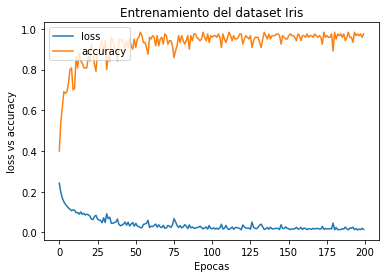

In [25]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Entrenamiento del dataset Iris')
plt.xlabel('Epocas')
plt.ylabel('loss vs accuracy')
plt.legend(loc='upper left')
plt.show()

### Test

Durante el entrenamiento *accuracy* nos indica el porcentaje de aciertos sobre el mismo conjunto de entrenamiento. Pero nos interesa conocer el porcentaje de acierto sobre un conjunto no visto antes por la red. Para ello utilizamos el conjunto de test. 

In [26]:
#test de la clasificación
model.evaluate(x_test, y_test, verbose=1)


1/1 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9667


[0.02170800045132637, 0.9666666388511658]

### Predicción

Una vez entrenada y testeada la red, podemos ponerla en producción. Keras tiene funciones para guardar tanto el modelo como los pesos ya entrenados. Si queremos hacer una clasifiación invocaremos el método <code>predict</code> del modelo.

Vamos a ver qué resultados nos ofrece la red si introducimos el conjunto de test.

In [27]:
# predicción 
model.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 5) dtype=float32, numpy=
 array([[ 0.36636436, -0.5973542 , -1.7058663 ,  1.7552307 ,  0.8206244 ],
        [ 1.5093688 , -0.8386259 , -2.5542686 ,  2.811278  ,  0.7864868 ],
        [-2.3739192 ,  1.7391009 ,  3.0826144 , -3.336249  ,  0.06354582],
        [-0.836125  , -0.02967625,  3.358346  , -3.465269  , -0.5345416 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 0.14581363, -0.29582483, -1.4318016 ,  1.4815521 ,  0.01543544],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(5, 3) dtype=float32, numpy=
 array([[ 2.8471985 , -2.9068136 , -1.5262318 ],
        [-2.5993123 ,  0.14927809,  1.339756  ],
        [-0.99167204, -1.7094735 ,  2.4502237 ],
        [ 1.7600808 ,  1.489743  , -3.2915258 ],
        [-0.01629438,  1.0776149 , -0.4368056 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([-0.59950936,  0.42706957,  0.17244029], dtype=fl

In [28]:
model.predict(x_test)

array([[1.3012302e-03, 7.6590374e-02, 9.2210835e-01],
       [9.7626561e-01, 2.3600744e-02, 1.3369850e-04],
       [2.0466936e-03, 1.0081193e-01, 8.9714134e-01],
       [2.3098318e-02, 9.5173234e-01, 2.5169225e-02],
       [9.7110277e-01, 2.8736927e-02, 1.6034277e-04],
       [8.2167663e-04, 3.9876204e-02, 9.5930213e-01],
       [7.9866796e-04, 4.4533897e-02, 9.5466739e-01],
       [1.7448865e-02, 8.4737378e-01, 1.3517737e-01],
       [1.1258867e-02, 5.9983718e-01, 3.8890395e-01],
       [9.7449458e-01, 2.5362717e-02, 1.4273891e-04],
       [9.7486895e-01, 2.4988621e-02, 1.4231518e-04],
       [9.7365391e-01, 2.6197718e-02, 1.4838039e-04],
       [9.7670913e-01, 2.3159416e-02, 1.3139471e-04],
       [2.9237294e-03, 1.4505196e-01, 8.5202432e-01],
       [2.0177361e-02, 9.5060617e-01, 2.9216476e-02],
       [1.9302815e-03, 9.2935577e-02, 9.0513420e-01],
       [4.5284368e-02, 9.5041060e-01, 4.3051448e-03],
       [2.3452405e-02, 9.6101457e-01, 1.5533021e-02],
       [9.7660112e-01, 2.326

## Ejercicio

- Varía algunos hiperparámetros (learning rate, tamaño del mini-lote, número de neuronas en la capa oculta, número de épocas) y observa qué ocurre.


